<a href="https://colab.research.google.com/github/salman-118114/RED_WINE_EDA/blob/main/Red_Wine_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Insights:
Target imbalance: Most wines are 5–6 → need balancing for fair modeling.

Key predictive features: Alcohol, volatile acidity, sulphates.

PCA visualization: Overlap exists → minority classes harder to predict.

Balancing strategies: SMOTE, SMOTEENN, and RandomUnderSampler demonstrated.

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salman118114","key":"6c39f45d6543f133e61729d8adabb6cc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d  uciml/red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 64.2MB/s]


In [ ]:
!unzip red-wine-quality-cortez-et-al-2009.zip

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df_original = pd.read_csv('winequality-red.csv')
df = df_original.copy()

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Clean the data


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No null values

In [ ]:
df.shape

(1599, 12)

In [ ]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1359, 12)

Duplicates cleaned

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df['quality'].value_counts()

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


Impalanced output column

<Axes: >

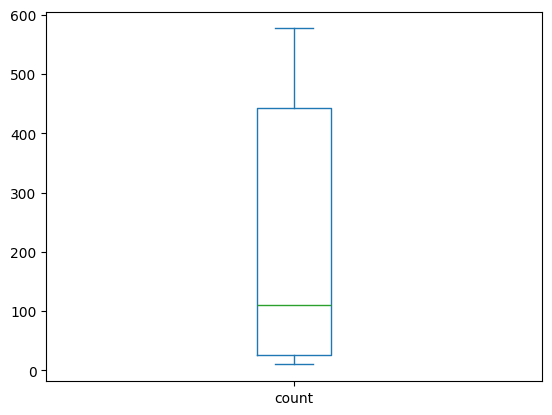

In [ ]:
df['quality'].value_counts().plot(kind='box')

no outliers

Text(0, 0.5, 'Count')

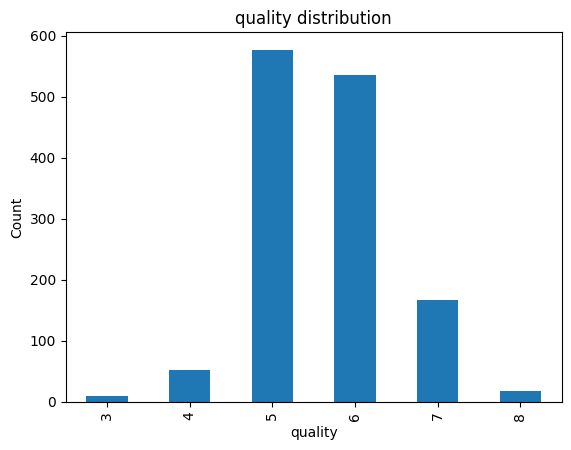

In [ ]:
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('quality distribution')
plt.ylabel('Count')

### Correlation Analysis



<Axes: >

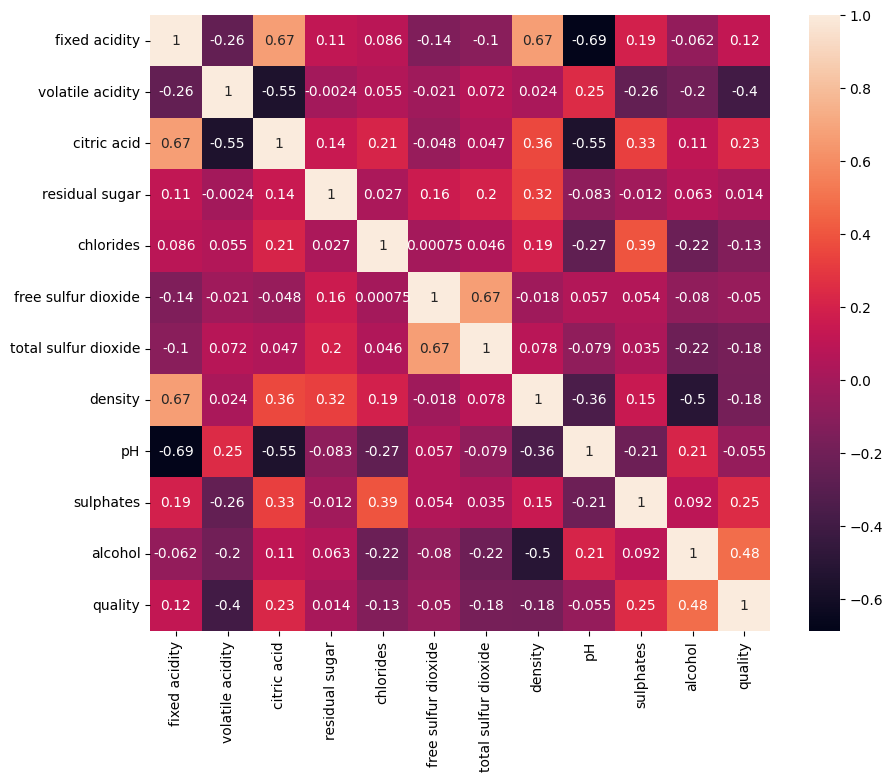

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

| Feature          | Correlation |
| ---------------- | ----------- |
| Alcohol          | +0.44       |
| Volatile acidity | -0.39       |
| Sulphates        | +0.25       |


### Univariate Feature Analysis

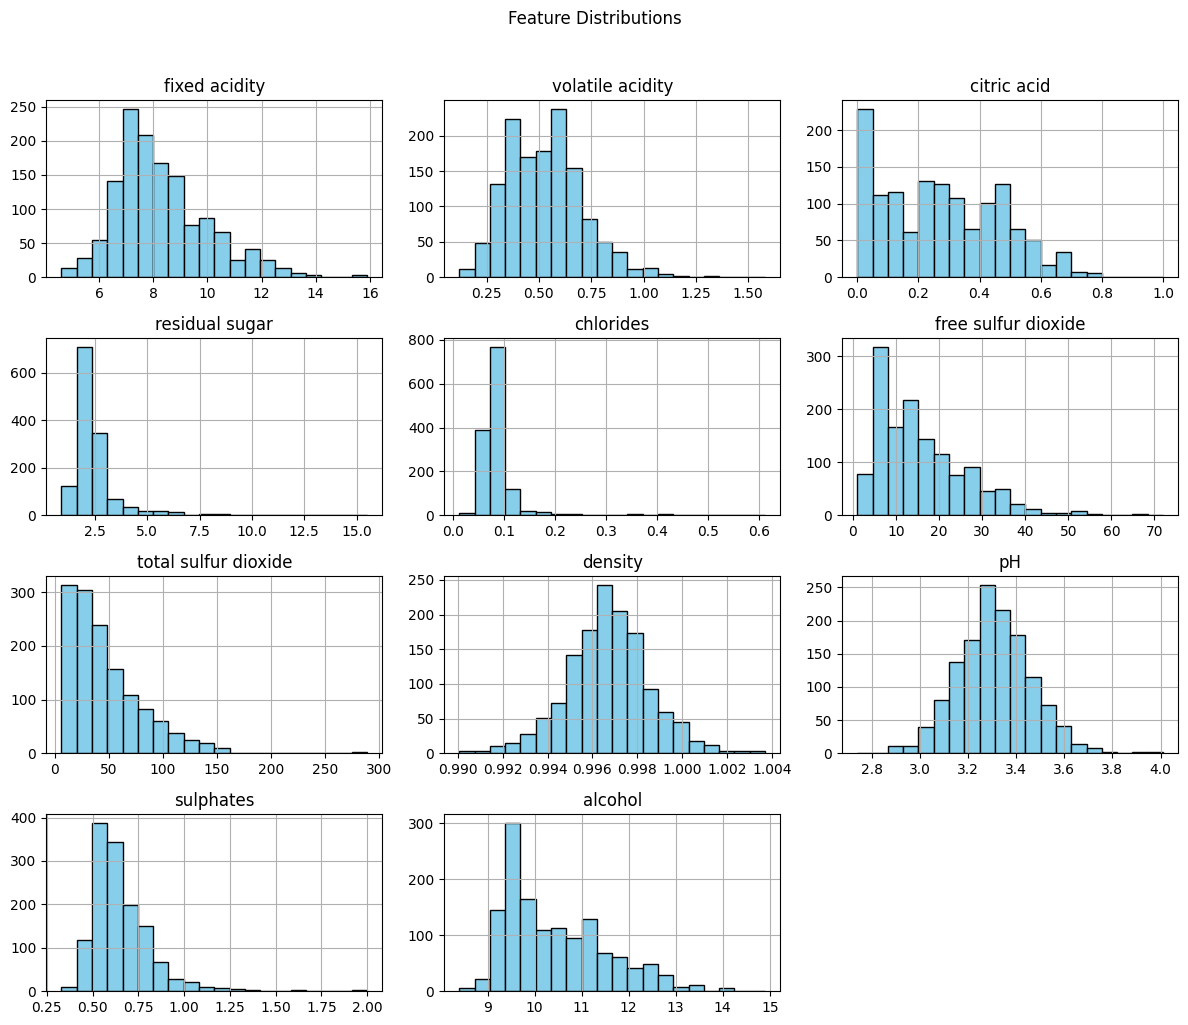

In [ ]:
num_cols = df.columns.drop('quality')

# Histograms
df[num_cols].hist(bins=20, figsize=(12,10), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

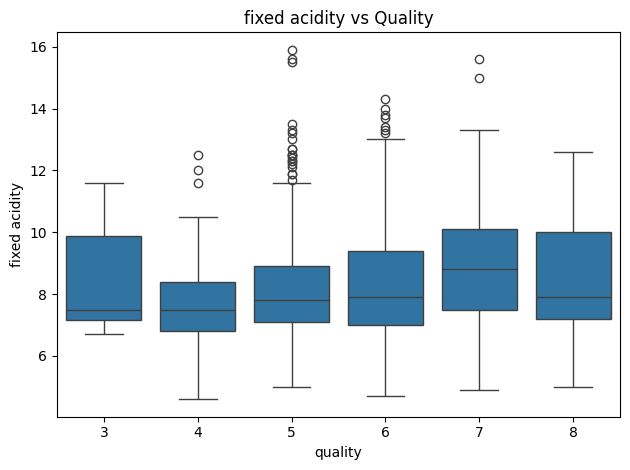

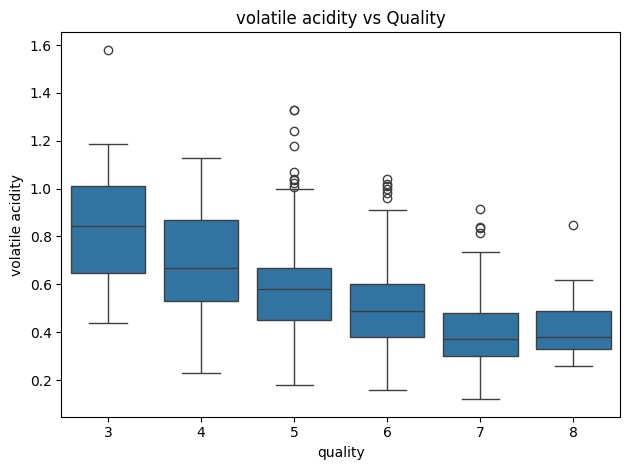

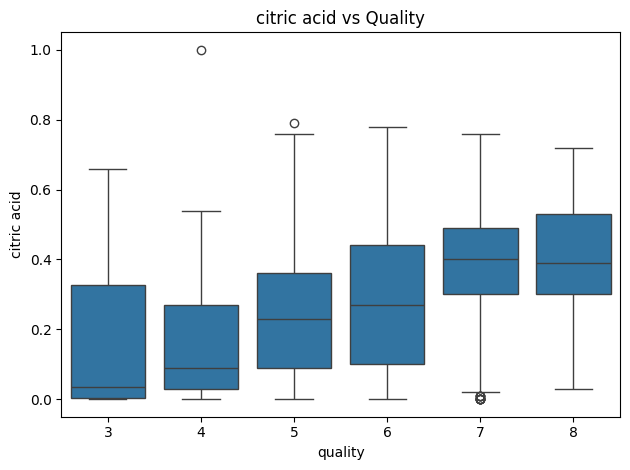

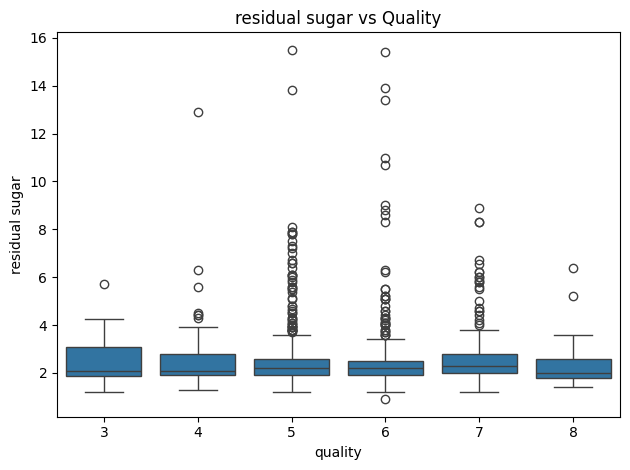

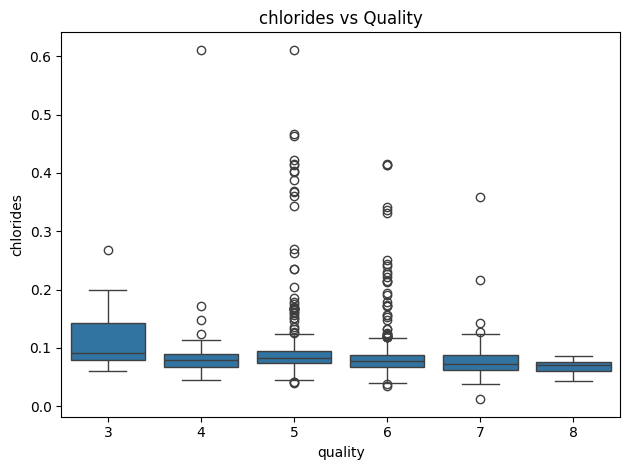

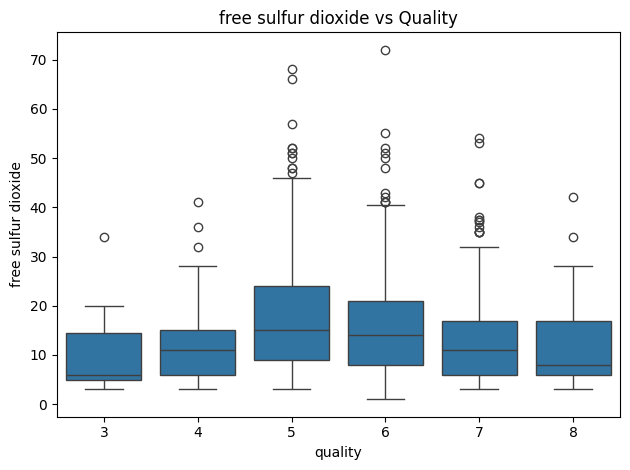

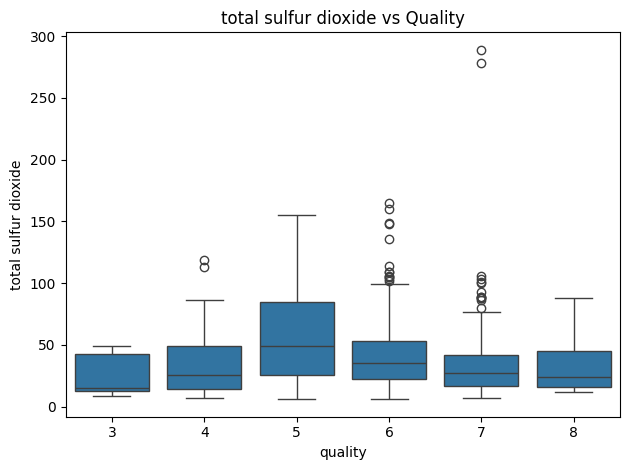

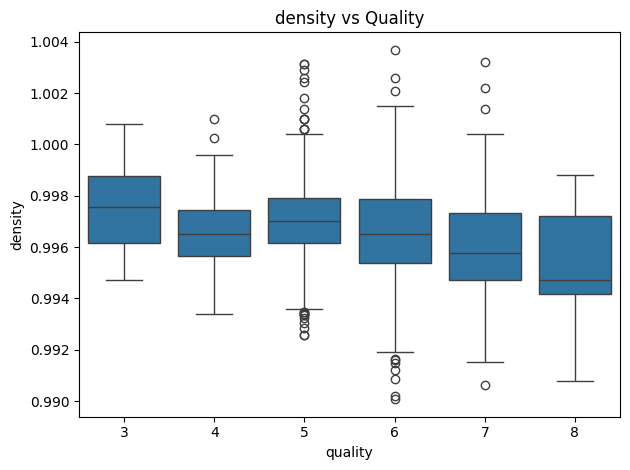

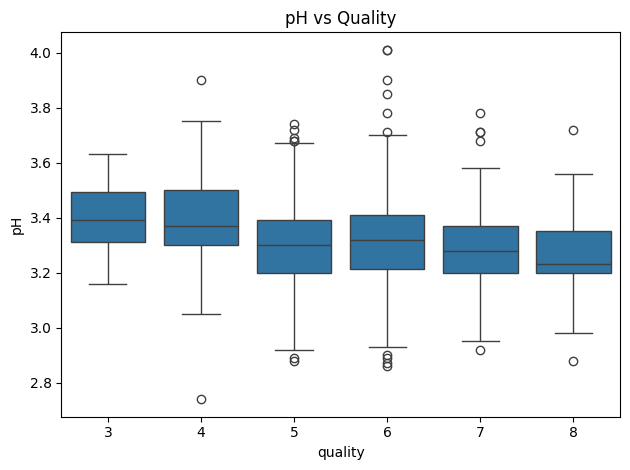

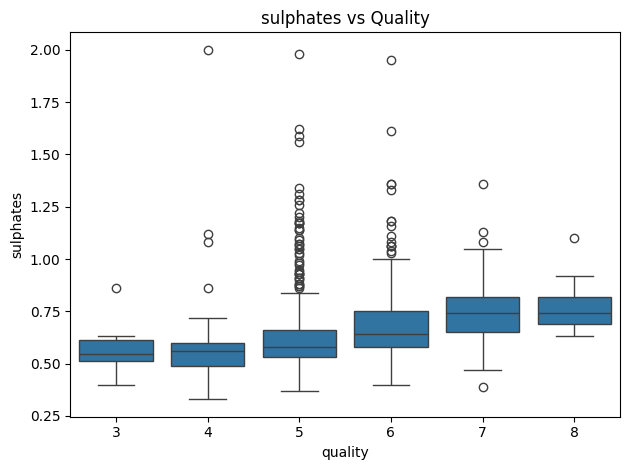

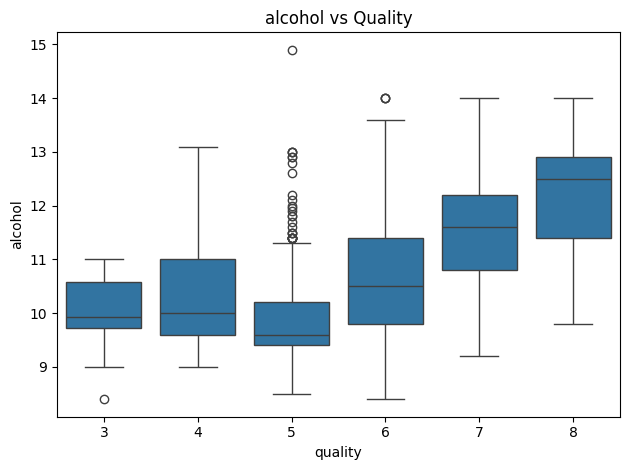

In [ ]:
# Boxplots grouped by quality
for col in num_cols:
    plt.figure()
    sns.boxplot(x="quality", y=col, data=df)
    plt.title(f"{col} vs Quality")
    plt.tight_layout()
    plt.show()


### Dimensionality Reduction (PCA)

<Axes: >

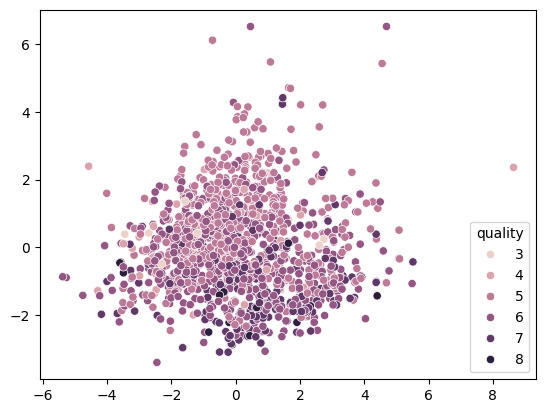

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(df.drop("quality", axis=1))
pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=df["quality"])


Classes 5 & 6 overlap heavily → confirms imbalance problem.

Minor classes (3 & 8) are isolated → fewer samples.

### Handling Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop("quality", axis=1)
y = df["quality"]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before:", Counter(y))
print("After SMOTE:", Counter(y_res))


Before: Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})
After SMOTE: Counter({5: 577, 6: 577, 7: 577, 4: 577, 8: 577, 3: 577})
